# Intro to Quantum Programming - Spring 2021
## Homework 2: Due 02/26/2021

For each exercise below, add as many cells as you want. To evaluate your submission, I will do **Restart and Run All**. . For help with Markdown, see [this link](https://www.markdownguide.org/).

In [1]:
# Here's a cell for import statements... add more if necessary (or just import below as needed)
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, AncillaRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library.standard_gates import XGate, CXGate, SGate, CPhaseGate, PhaseGate
from kaleidoscope.interactive import bloch_disc, bloch_multi_disc, bloch_sphere
import numpy as np
import math

C:\Users\Quentin\Anaconda3\envs\Quantum38\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


For all the exercises below, you may use the multi-controlled Toffoli gate (known as `mcx` or `mct`), but don't use higher-level gates from the circuit library, such as adders, comparators, etc. This assignment is about learning how to build those things.

----
#### Exercise 2.1

Define a function that creates a quantum circuit that adds a specified 4-bit unsigned integer value to a 4-qubit register, which represents a 4-bit unsigned integer. NOTE: This is not to add two quantum registers together. This is to increment a 4qb register by a fixed integer amount.

Demonstrate your function with at least three different "interesting" increment amounts. Draw the resulting circuit and show its operation. Verify that it works as expected on classical and superposition states.

In [2]:
# Internal Function used to convert a bit (in string form) into a circuit
# Works recursively
# Called by the Add function below

def GenAddition(bit, q1):
    numQubits = 4
    height = len(bit)
    if height != 1:
        GenAddition(bit[1:], q1)
    if bit[0] == '1':
        location = numQubits - height
        for i in range(location):
            gates = []
            for x in reversed(range(3 - location, 3 - i + 1)):
                gates.insert(0, x)
            q1.append(XGate().control(len(gates) - 1), gates)
        q1.x(height - 1)

In [3]:
# Function that adds a specified 4-bit unsigned integer value (val) to a 4-qubit register (q1)
# Calls on GenAddition

def Add(val, a):
    bit = '{0:04b}'.format(val)
    high = 3
    q1 = QuantumCircuit(a)            
    
    GenAddition(bit,q1)
    return q1

In [4]:
# Demonstrate the circuit by adding 1 to a empty circuit

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)

q1.append(Add(1, a), a)
q1.barrier()
q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  0001
Result: 		{'0001': 1024}


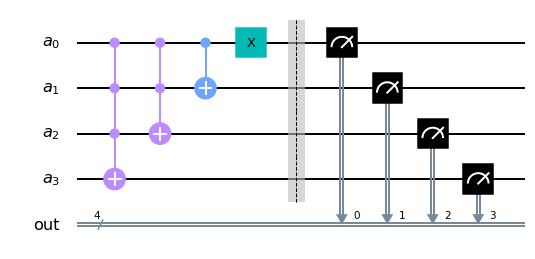

In [5]:
# Expected output is 0001 because |0000> + 0001 = 0001
print("Expected Value: \t  0001")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [6]:
# Demonstrate the circuit by adding 2 to a empty circuit

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.append(Add(2, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  0010
Result: 		{'0010': 1024}


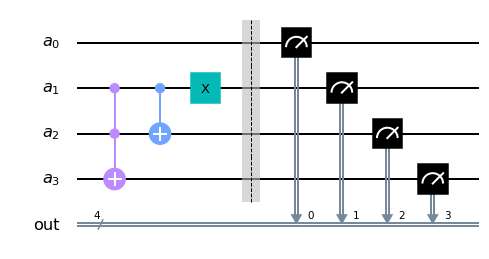

In [7]:
# Expected output is 0010 because 0000 + 0010 = 0010
print("Expected Value: \t  0010")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [8]:
# Demonstrate the circuit by adding 4 to a empty circuit

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.append(Add(4, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  0100
Result: 		{'0100': 1024}


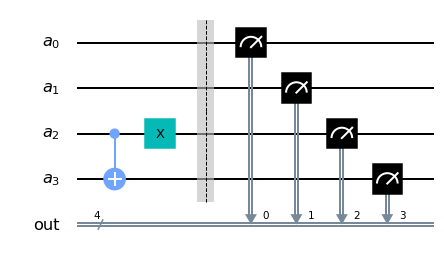

In [9]:
# Expected output is 0100 because 0000 + 0100 = 0100
print("Expected Value: \t  0100")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [10]:
# Demonstrate the circuit by adding 15 to a empty circuit

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.append(Add(15, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  1111
Result: 		{'1111': 1024}


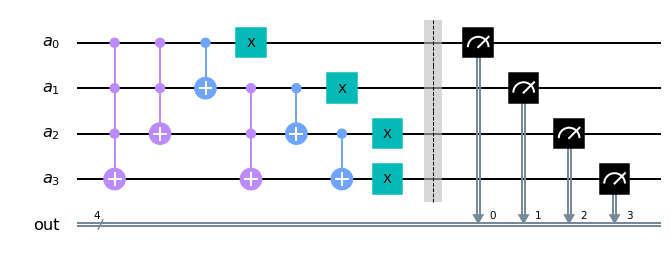

In [11]:
# Expected output is 1111 because 0000 + 1111 = 1111
print("Expected Value: \t  1111")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [12]:
# Demonstrate the circuit by adding 7 to a circuit with value of 4 (0100)

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.x(2)
q1.barrier()


q1.append(Add(7, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  1011
Result: 		{'1011': 1024}


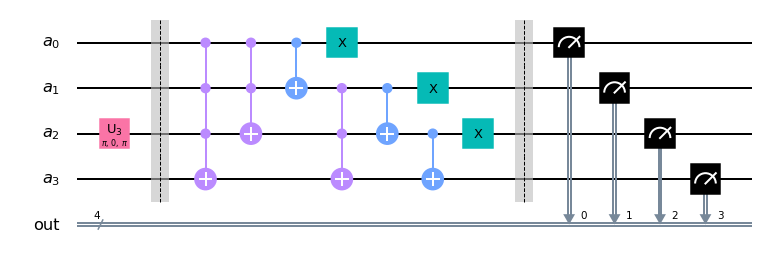

In [13]:
# Expected output is 1011 because 0100 + 0111 = 1011
print("Expected Value: \t  1011")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [14]:
# Demonstrate the circuit by adding 6 to a circuit with value of 7 (0111)

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.x(a[0:3])
q1.barrier()

q1.append(Add(6, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  1101
Result: 		{'1101': 1024}


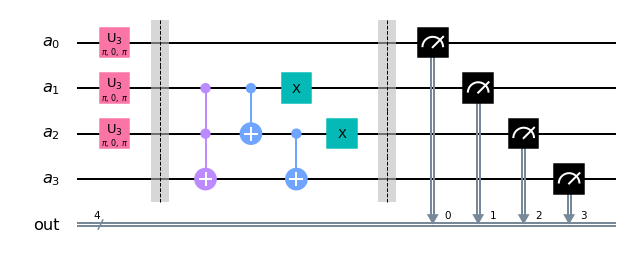

In [15]:
# Expected output is 1101 because 0111 + 0110 = 1101
# FIXME
print("Expected Value: \t  1101")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [16]:
# Demonstrate the circuit by adding 1 to a circuit with the value |1111>

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.x(0)
q1.x(1)
q1.x(2)
q1.x(3)
q1.barrier()

q1.append(Add(1, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Value: 	  0000
Result: 		{'0000': 1024}


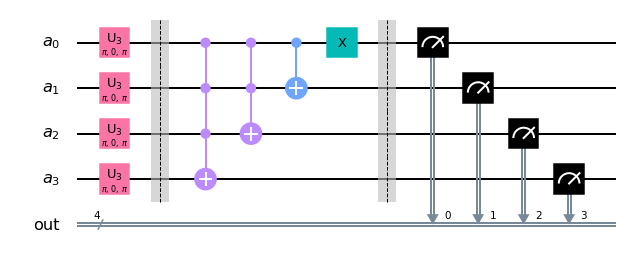

In [17]:
# Expected output is 0000 because 1111 + 0001 = 0000 due to overflow
print("Expected Value: \t  0000")
print("Result: \t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

In [18]:
# Demonstrate the circuit by adding 2 to a circuit in a bellstate
# Expected output: around 512 '0001' and 512 '0010' 

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(4, 'a')
c = ClassicalRegister(4, name="out")
q1 = QuantumCircuit(a, c)
q1.h(0)
q1.cx(0, 1)
q1.cx(0, 2)
q1.cx(0, 3)
q1.barrier()

q1.append(Add(2, a), a)
q1.barrier()

q1.measure(0,0)
q1.measure(1,1)
q1.measure(2,2)
q1.measure(3,3)

job = execute(q1, qsim, shots=1024)
result = job.result()

Expected Values: (Around) 	  0001 : 512,  0010 : 512
Result: 			{'0001': 510, '0010': 514}


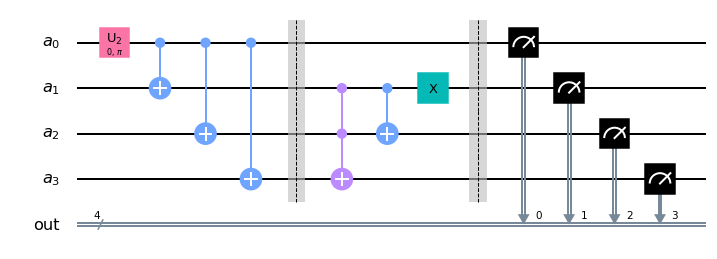

In [19]:
# Expected output is half 0001 and half 0010 because the initial state is as likely to be 
# 0000 as 1111, and 1111 + 0010 = 0001 and 0000 + 0010 = 0010 
print("Expected Values: (Around) \t  0001 : 512,  0010 : 512")
print("Result: \t\t\t" + str(result.get_counts(q1)))
q1.decompose().draw('mpl')

----
#### Exercise 2.2

Define a function that contructs a circuit to test whether a four-qubit circuit is equal to a specific 4-bit value (n). The circuit will use five qubits: four for the register to test, and one for the result.

Draw the circuit for n = 6. Show the result of running the circuit for on an input state that is an equal superposition of all classical states.

In [20]:
# Internal function that adds an x gate to every part of the binary string that has a zero to negate it
# Works using recursion
# Bit = int value as binary string, qc = quantum circuit

def XGates(bit, qc):
    length = len(bit)
    if length != 1:
        XGates(bit[1:], qc)
    if bit[0] == '0':
        qc.x(length - 1)

In [21]:
# Constructs a circuit to test whether a four-qubit circuit is equal to a specific 4-bit value n
def testCircuit(n):
    qc = QuantumCircuit(5, name = 'CheckEquals')
    
    bit = '{0:04b}'.format(n)
    numQ = 4
    XGates(bit, qc)

    qc.append(XGate().control(numQ), [*range(0, numQ + 1)])
    XGates(bit, qc)
    
    return qc

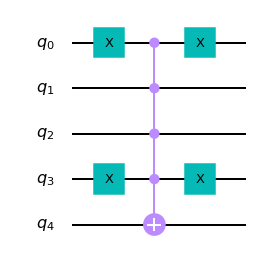

In [22]:
# Draws the circuit for n = 6
finalQ = testCircuit(6)
finalQ.draw('mpl')

In [23]:
# Tests the circuit for n = 6 if the value of the circuit before is 6

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(5, 'a')
c = ClassicalRegister(1, name="out")
finalQ = QuantumCircuit(a, c)

# Initializes circuit to value of 6
finalQ.x(1)
finalQ.x(2)

q1.barrier()
finalQ.append(testCircuit(6), a)
q1.barrier()
finalQ.measure(4,0)
job = execute(finalQ, qsim, shots=1024)
result = job.result()

Expected Value: 	  1
Result: 		{'1': 1024}


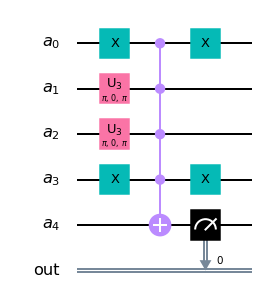

In [24]:
# Expected output is 1 because 6 == 6
print("Expected Value: \t  1")
print("Result: \t\t" + str(result.get_counts(finalQ)))
finalQ.decompose().draw('mpl')

In [25]:
# Tests the circuit for n = 6 if the value of the circuit before is 5

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(5, 'a')
c = ClassicalRegister(1, name="out")
finalQ = QuantumCircuit(a, c)

# Initializes circuit to value of 6
finalQ.x(1)
finalQ.x(3)

q1.barrier()
finalQ.append(testCircuit(6), a)
q1.barrier()
finalQ.measure(4,0)
job = execute(finalQ, qsim, shots=1024)
result = job.result()

Expected Value: 	  0
Result: 		{'0': 1024}


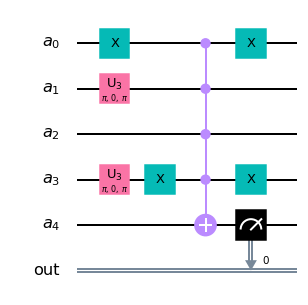

In [26]:
# Expected output is 0 because 5 != 6
print("Expected Value: \t  0")
print("Result: \t\t" + str(result.get_counts(finalQ)))
finalQ.decompose().draw('mpl')

In [27]:
# Tests the circuit for n = 6 if the value of the circuit before is in an equal superposition

qsim = Aer.get_backend('qasm_simulator')
a = QuantumRegister(5, 'a')
c = ClassicalRegister(1, name="out")
finalQ = QuantumCircuit(a, c)

finalQ.h(a[0:4])
finalQ.barrier()

finalQ.append(testCircuit(6), a)
q1.barrier()
finalQ.measure(4,0)
job = execute(finalQ, qsim, shots=1024)
result = job.result()

Each qubit has a 50% chance of being |0> and 50% chance of being |1>
Therefore, there are 16 possibilities, and a 1/16 chance of the value being |0110> (6 in binary)

Expected Values: (Around) 	Wrong 94% of the time, Correct 6% of the time
Result: 			Wrong 94% of the time, Correct 6% of the time
(Numeric Result: 		{'0': 958, '1': 66})


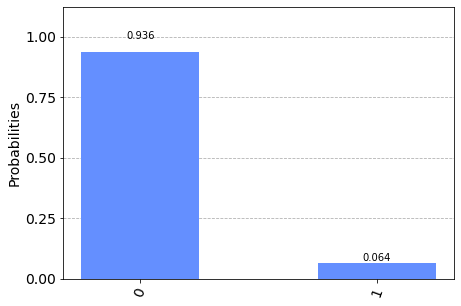

In [28]:
print("Each qubit has a 50% chance of being |0> and 50% chance of being |1>")
print("Therefore, there are 16 possibilities, and a 1/16 chance of the value being |0110> (6 in binary)\n")

wrong = result.get_counts(finalQ).get('0') / 1024 * 100
right = result.get_counts(finalQ).get('1') / 1024 * 100

print("Expected Values: (Around) \tWrong 94% of the time, Correct 6% of the time")
print("Result: \t\t\tWrong " + str(round(wrong)) + "% of the time, Correct " + str(round(right)) + "% of the time")
print("(Numeric Result: \t\t" + str(result.get_counts(finalQ)) + ")")
plot_histogram(result.get_counts(finalQ))

----
#### Exercise 2.3

Using the functions from 2.1 and 2.2 as building blocks, define a function that builds a circuit that has two four-qubit quantum registers -- we'll call them *a* and *b*. The function should include a 4-bit unsigned integer (*n*), and it should increment *b* by *n* if and only if *a* == *n*.

The extra qubit used for the equality test (2.2) should not be included in the parameters of your function. That qubit will be created and used by your function, but will not be visible to the caller of your function. In other words, this is an *ancilla* qubit that is only used for a temporary purpose.

Demonstrate the circuit.

In [29]:
# Defines a function that adds an integer value n to the quantum register 'b' if the quantum register 'a' == n 
def ex3(a, b, n):
    k = AncillaRegister(1, 'k')
    qc = QuantumCircuit(a,k,b)
    qc.append(testCircuit(n), a[:]+k[:])
    
    nc = Add(n, b).control(1);
    qc.append(nc, k[:]+b[:])
    
    return qc

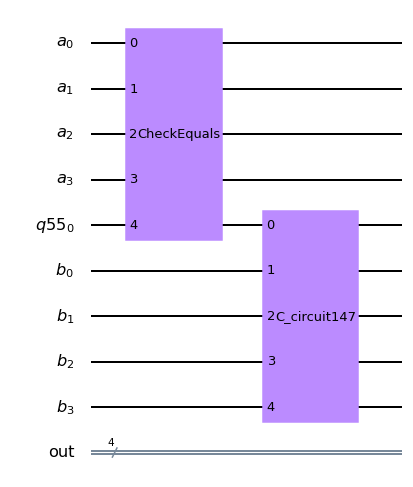

In [30]:
# Draws the function to demonstrate it (with an input of n = 1)
a = QuantumRegister(4, 'a')
b = QuantumRegister(4, 'b')
z = QuantumRegister(1)
c = ClassicalRegister(4, name="out")
finalQ = QuantumCircuit(a,z,b,c)
finalQ.append(ex3(a,b,1),a[:]+z[:]+b[:])
finalQ.decompose().draw('mpl')

In [31]:
# Tests the function using a circuit with a = |0001>, b = |0000> and n = 1
a = QuantumRegister(4, 'a')
b = QuantumRegister(4, 'b')
z = QuantumRegister(1)
c = ClassicalRegister(4, name="out")
finalQ = QuantumCircuit(a,z,b,c)

finalQ.x(0)
finalQ.append(ex3(a,b,1),a[:]+z[:]+b[:])

for i in range(4):
    finalQ.measure(b[i],i)
    
job = execute(finalQ, qsim, shots=1024)
result = job.result()

In [32]:
# Expected output is 0001 because a == n, and b (0000) + 0001 = 0001
print("Expected Value: \t  0001")
print("Result: \t\t" + str(result.get_counts(finalQ)))

Expected Value: 	  0001
Result: 		{'0001': 1024}


In [33]:
# Tests the function using a circuit with a = |1101>, b = |0010> and n = 13
a = QuantumRegister(4, 'a')
b = QuantumRegister(4, 'b')
z = QuantumRegister(1)
c = ClassicalRegister(4, name="out")
finalQ = QuantumCircuit(a,z,b,c)

finalQ.x(a[0])
finalQ.x(a[2])
finalQ.x(a[3])
finalQ.x(b[1])
finalQ.append(ex3(a,b,13),a[:]+z[:]+b[:])

for i in range(4):
    finalQ.measure(b[i],i)
    
job = execute(finalQ, qsim, shots=1024)
result = job.result()

In [34]:
# Expected output is 1111 because a == n, and b (0010) + 1101 = 1111
print("Expected Value: \t  1111")
print("Result: \t\t" + str(result.get_counts(finalQ)))

Expected Value: 	  1111
Result: 		{'1111': 1024}


In [35]:
# Tests the function using a circuit with a = |1101>, b = |0010> and n = 12
a = QuantumRegister(4, 'a')
b = QuantumRegister(4, 'b')
z = QuantumRegister(1)
c = ClassicalRegister(4, name="out")
finalQ = QuantumCircuit(a,z,b,c)

finalQ.x(a[0])
finalQ.x(a[2])
finalQ.x(a[3])
finalQ.x(b[1])
finalQ.append(ex3(a,b,12),a[:]+z[:]+b[:])

for i in range(4):
    finalQ.measure(b[i],i)
    
job = execute(finalQ, qsim, shots=1024)
result = job.result()

In [36]:
# Expected output is 0010 because a != n, so b (0010) doesn't cahnge
print("Expected Value: \t  0010")
print("Result: \t\t" + str(result.get_counts(finalQ)))

Expected Value: 	  0010
Result: 		{'0010': 1024}


In [37]:
# Tests the function using a circuit with a = |++++>, b = |0010> and n = 13
a = QuantumRegister(4, 'a')
b = QuantumRegister(4, 'b')
z = QuantumRegister(1)
c = ClassicalRegister(4, name="out")
finalQ = QuantumCircuit(a,z,b,c)

finalQ.h(a[0])
finalQ.h(a[1])
finalQ.h(a[2])
finalQ.h(a[3])
finalQ.x(b[1])
finalQ.append(ex3(a,b,13),a[:]+z[:]+b[:])

for i in range(4):
    finalQ.measure(b[i],i)
    
job = execute(finalQ, qsim, shots=1024)
result = job.result()

Each qubit has a 50% chance of being |0> and 50% chance of being |1>
Therefore, there are 16 possibilities, and a 1/16 chance of the value being |1101> (13 in binary)

Expected Values: (Around) 	Wrong 94% of the time, Correct 6% of the time
Result: 			Wrong 95% of the time, Correct 5% of the time
(Numeric Result: 		{'0010': 970, '1111': 54})


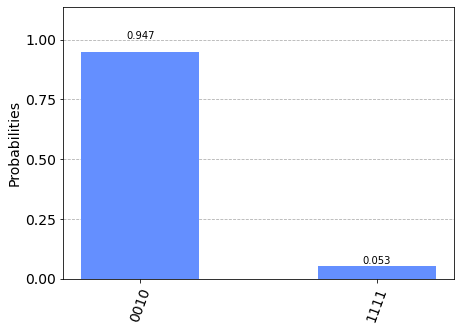

In [38]:
print("Each qubit has a 50% chance of being |0> and 50% chance of being |1>")
print("Therefore, there are 16 possibilities, and a 1/16 chance of the value being |1101> (13 in binary)\n")

wrong = result.get_counts(finalQ).get('0010') / 1024 * 100
right = result.get_counts(finalQ).get('1111') / 1024 * 100

print("Expected Values: (Around) \tWrong 94% of the time, Correct 6% of the time")
print("Result: \t\t\tWrong " + str(round(wrong)) + "% of the time, Correct " + str(round(right)) + "% of the time")
print("(Numeric Result: \t\t" + str(result.get_counts(finalQ)) + ")")
plot_histogram(result.get_counts(finalQ))

----
#### Exercise 2.4

Given a four-qubit state ($q$) that is an equal superposition of classical states, design a circuit that adds a phase of $90^\circ$ to all states where $q_1$ and $q_2$ are different. Draw the circuit and demonstrate that it works correctly.

In [39]:
# This functions tests a 4 qubit circuit and adds a phase of 90 degrees if 
# q1 and q2 are in different states
# It uses an Ancilla qubit

def createA():
    a = QuantumRegister(4)
    k = AncillaRegister(1, 'k')
    qc = QuantumCircuit(a,k)
    qc.ccx(a[1],a[2],k[0])
    qc.append(XGate().control(2, ctrl_state=0), (a[1],a[2],k[0]))
    
    for i in range(4):
        qc.append(PhaseGate(math.pi/2).control(1), (k[0], a[i]))
    return qc

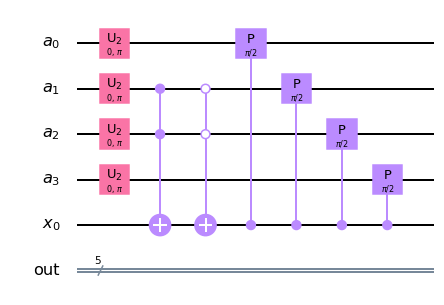

In [40]:
# Example of the function with an initial state of equal superposition
# Outputs the results, and draws the circuit

a = QuantumRegister(4, 'a')
x = QuantumRegister(1, 'x')
c = ClassicalRegister(5, name="out")
finalQ = QuantumCircuit(a,x,c)
finalQ.h(a[:])
finalQ.append(createA(), a[:]+x[:])
finalQ.decompose().draw('mpl')

To prove this circuit, we can examine the effects of the following two circuit:

In [41]:
qEx = QuantumCircuit(1, 1)
qEx.h(0)
qEx.sx(0)
qEx.measure(0, 0)

qsim = Aer.get_backend('qasm_simulator')
job = execute(qEx, qsim, shots=1024)
result = job.result()

Circuit 1
Expected Results:	  0 : 512,  1 : 512
Actual Result:		{'0': 532, '1': 492}


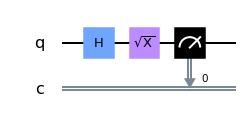

In [42]:
# Expected Results are half 0s and half 1s
print("Circuit 1")
print("Expected Results:\t  0 : 512,  1 : 512")
print("Actual Result:\t\t" + str(result.get_counts(qEx)))
qEx.draw('mpl')

In [43]:
qEx = QuantumCircuit(1, 1)
qEx.h(0)
qEx.p(math.pi/2, 0)
qEx.sx(0)
qEx.measure(0, 0)

qsim = Aer.get_backend('qasm_simulator')
job = execute(qEx, qsim, shots=1024)
result = job.result()

Circuit 2
Expected Results:	  0 : 1024
Actual Result:		{'0': 1024}


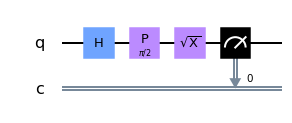

In [44]:
# Expected Results are all 0s
print("Circuit 2")
print("Expected Results:\t  0 : 1024")
print("Actual Result:\t\t" + str(result.get_counts(qEx)))
qEx.draw('mpl')

We can now use these two circuits to prove that the phaseAdd function is working by running it on a circuit where the phase is to be added, and one where the phase isn't to be added

In [45]:
# Q1 != Q2 so phaseAdd should be added

a = QuantumRegister(4, 'a')
x = QuantumRegister(1, 'x')
c = ClassicalRegister(5, name="out")
finalQ = QuantumCircuit(a,x,c)
finalQ.h(a[0])
finalQ.x(a[1])
finalQ.append(createA(), a[:]+x[:])
finalQ.sx(0)
finalQ.measure(0,0)

qsim = Aer.get_backend('qasm_simulator')
job = execute(finalQ, qsim, shots=1024)
result = job.result()

Phase should be added: 
Expected Results:	  00000 : 512,  00001 : 512
Actual Result:		{'00000': 505, '00001': 519}


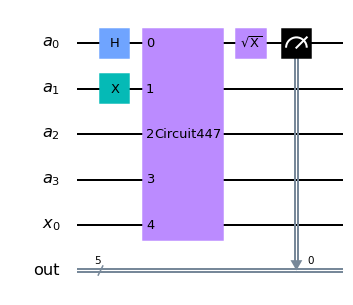

In [46]:
# Expected Results for the lowest order bit are half 0s and half 1s
print("Phase should be added: ")
print("Expected Results:\t  00000 : 512,  00001 : 512")
print("Actual Result:\t\t" + str(result.get_counts(finalQ)))
finalQ.draw('mpl')

In [47]:
# Q1 == Q2 so phaseAdd shouldn't be added

a = QuantumRegister(4, 'a')
x = QuantumRegister(1, 'x')
c = ClassicalRegister(5, name="out")
finalQ = QuantumCircuit(a,x,c)
finalQ.h(a[0])
finalQ.append(createA(), a[:]+x[:])
finalQ.sx(0)
finalQ.measure(0, 0)

qsim = Aer.get_backend('qasm_simulator')
job = execute(finalQ, qsim, shots=1024)
result = job.result()

Circuit 2
Expected Results:	  00000 : 1024
Actual Result:		{'00000': 1024}


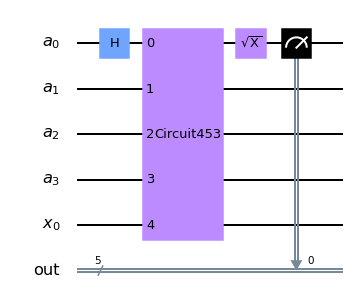

In [48]:
# Expected Results for the lowest order bit are all 0s
print("Circuit 2")
print("Expected Results:\t  00000 : 1024")
print("Actual Result:\t\t" + str(result.get_counts(finalQ)))
finalQ.draw('mpl')

From this proof of a single qubit, we can assume that the rest of the circuit should work the same.